<a href="https://colab.research.google.com/github/yonathanm772/MLA_JMA/blob/main/LR_Practice_JMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Load a dataset
lr_dataset = pd.read_csv('/content/drive/MyDrive/CS 430/Comparative Analysis of Regression Models/data.csv')


In [ ]:
# Check data
lr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [ ]:
# Number of rows and columns
lr_dataset.shape

(11914, 16)

In [ ]:
# Column names
lr_dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
# Data type of each column
lr_dataset.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [ ]:
# Checks for missing data in the dataset
lr_dataset.isnull().sum()

,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6
Market Category,3742


### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [ ]:
# Summary statistics of the numerical columns
lr_dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

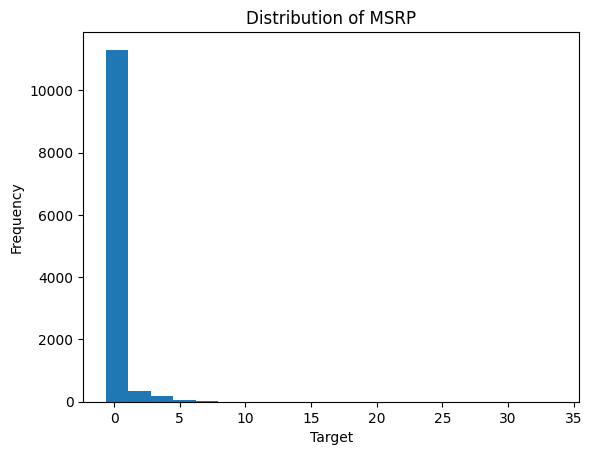

In [ ]:
# Scale the msrp using standardscaler
scaler = StandardScaler()
lr_dataset['MSRP'] = scaler.fit_transform(lr_dataset[['MSRP']])
y = lr_dataset['MSRP']

# Target Variable distribution
plt.hist(lr_dataset['MSRP'], bins=20)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of MSRP')
plt.show()

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

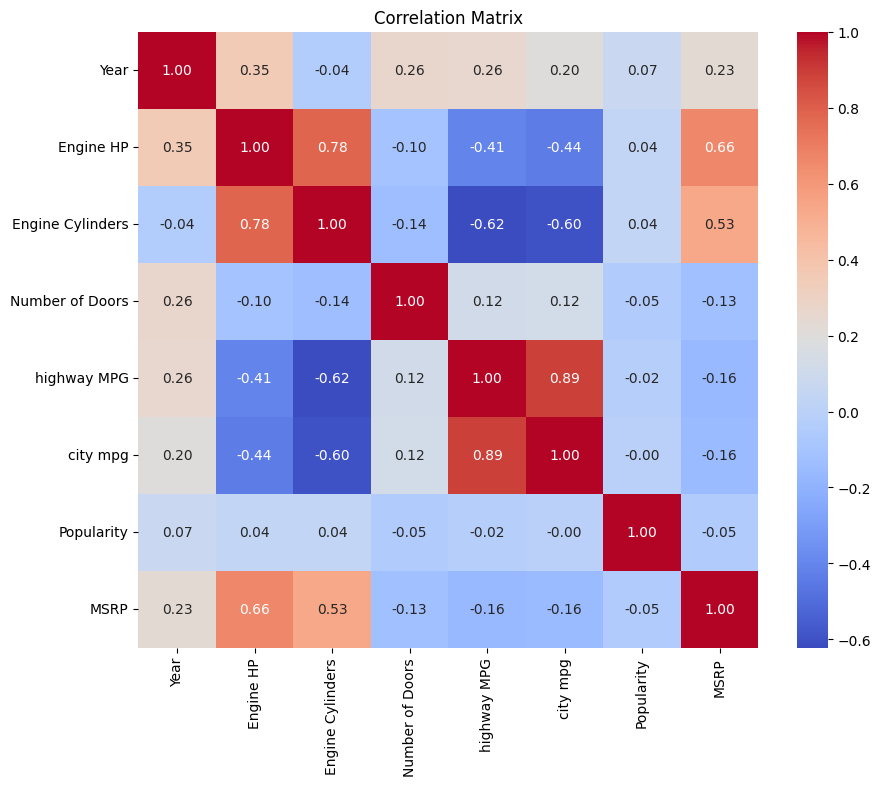

In [ ]:
# numerical variables
numerical_data = lr_dataset.select_dtypes(include=['number'])

# Correlations between the numerical variables
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

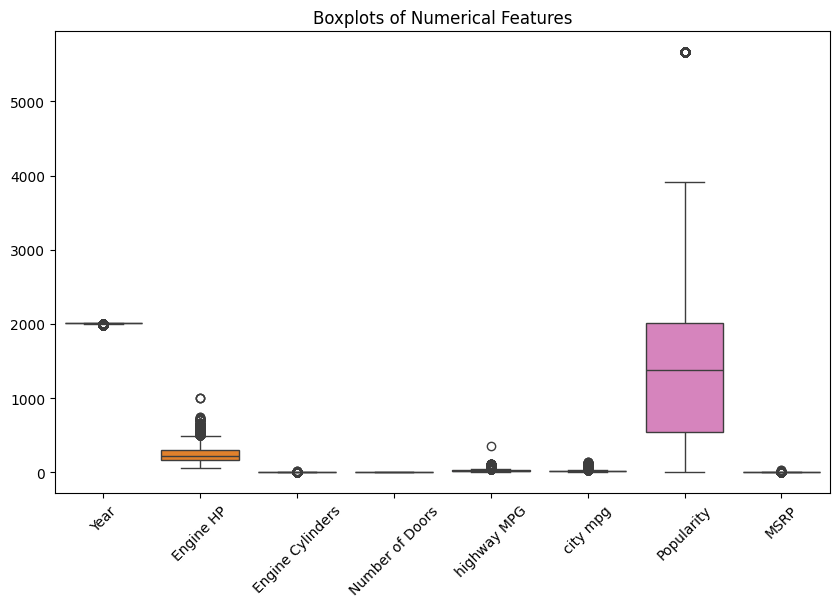

In [ ]:
# Boxplot to identify potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data)
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
lr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  float64
dtypes: float64(4), int64(4

In [ ]:
# remove outliers in the numerical column
numerical_columns = lr_dataset.select_dtypes(include=['number']).columns
Q1 = lr_dataset[numerical_columns].quantile(0.25)
Q3 = lr_dataset[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lr_dataset_no_outlier = lr_dataset[~((lr_dataset[numerical_columns] < (Q1 - 0.6 * IQR)) | (lr_dataset[numerical_columns] > (Q3 + 0.6 * IQR))).any(axis=1)]

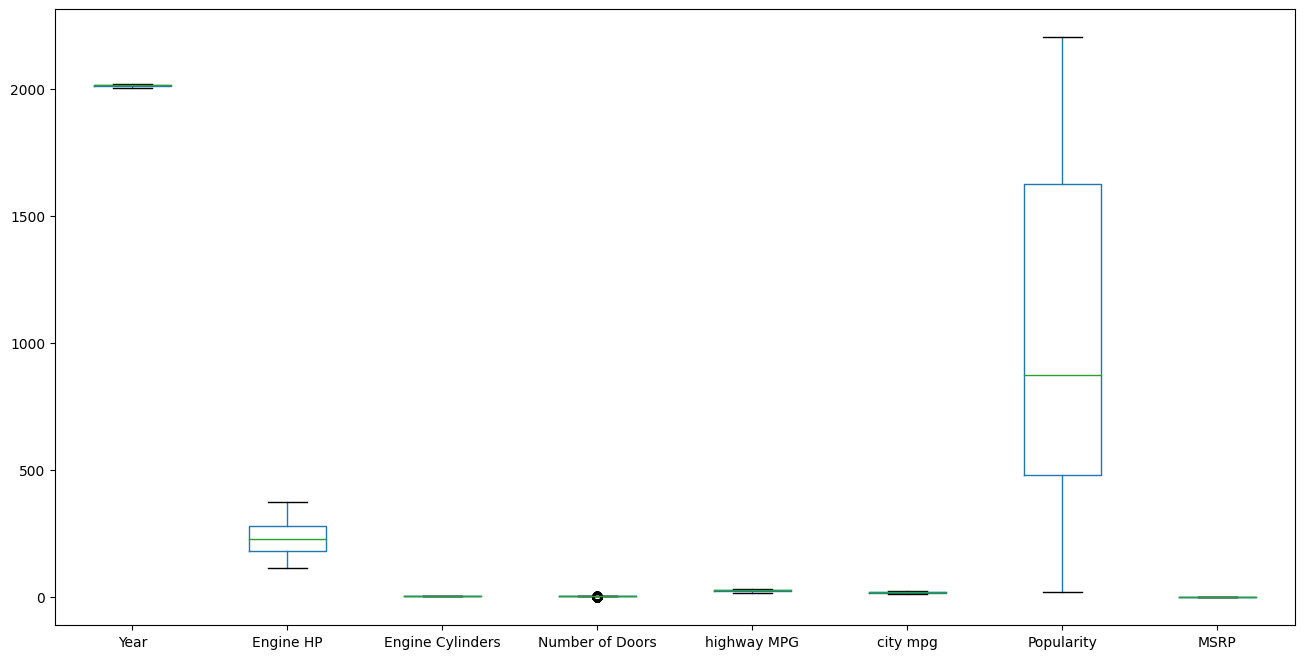

In [ ]:
plt.figure(figsize=(16, 8))
lr_dataset_no_outlier.boxplot()
plt.grid(False)

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [ ]:
# Remove duplicate rows
lr_dataset_no_outlier.duplicated().sum()

296

In [ ]:
# fill null data
lr_dataset_no_outlier.isnull().sum()


,0
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,8
Engine Cylinders,17
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Market Category,1551


### Split into features and target

In [ ]:
# split into features and target
X = lr_dataset_no_outlier.drop('MSRP', axis=1)
y = lr_dataset_no_outlier[['MSRP']]


In [ ]:
X

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
66,Chrysler,200,2015,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,29,18,1013
69,Chrysler,200,2015,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,29,18,1013
72,Chrysler,200,2016,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,29,18,1013
73,Chrysler,200,2016,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,29,18,1013
78,Chrysler,200,2017,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,28,18,1013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204


In [ ]:
y

,MSRP
66,-0.186747
69,-0.162540
72,-0.146569
73,-0.177846
78,-0.177846
...,...
11908,0.165128
11909,0.091924
11911,0.166791
11912,0.171783


### Feature Engineering

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 66 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               5245 non-null   object 
 1   Model              5245 non-null   object 
 2   Year               5245 non-null   int64  
 3   Engine Fuel Type   5242 non-null   object 
 4   Engine HP          5237 non-null   float64
 5   Engine Cylinders   5228 non-null   float64
 6   Transmission Type  5245 non-null   object 
 7   Driven_Wheels      5245 non-null   object 
 8   Number of Doors    5245 non-null   float64
 9   Market Category    3694 non-null   object 
 10  Vehicle Size       5245 non-null   object 
 11  Vehicle Style      5245 non-null   object 
 12  highway MPG        5245 non-null   int64  
 13  city mpg           5245 non-null   int64  
 14  Popularity         5245 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 655.6+ KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 66 to 11913
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSRP    5245 non-null   float64
dtypes: float64(1)
memory usage: 82.0 KB


In [ ]:
# Identify numerical column
numerical_features = X.select_dtypes(include=['number']).columns
# Identify categorical column
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
numerical_features

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

In [ ]:
categorical_features

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

### Preprocessing Pipelines

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




### Create a function to build and evaluate models using pipelines

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# scale y variable
#scaler = StandardScaler()
#y = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:

for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Squared Error: 0.0021
R² Score: 0.9093
--------------------------------------------------
Model: Ridge
Mean Squared Error: 0.0022
R² Score: 0.9066
--------------------------------------------------
Model: Lasso
Mean Squared Error: 0.0197
R² Score: 0.1516
--------------------------------------------------
Model: SGDRegressor
Mean Squared Error: 0.0040
R² Score: 0.8290
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: LinearRegression
Mean Squared Error: 0.0056
R² Score: 0.7580
--------------------------------------------------


### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.